### Table of contents:

* [Runtime](#time)
* [Analysis results evolution in Cybersecurity](#evolution)
* [Analysis results evolution in Medicine](#evolution)

In [1]:
import pandas as pd
import pickle
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

## Runtime <a class="anchor" id="time"></a>

In [2]:
preferences_comp = "{'previous_investments': 100, 'crunchbase_rank': 0}"

In [3]:
df = pd.read_csv("savings/useful_datasets/cybersecurity_df_rank_evolu.csv")
pd.options.display.float_format = "{:,.2f}".format
df.head(20)

,Unnamed: 0,Unnamed: 0.1,time_conv_tech,preferences_comp,number_iterations_comp,number_iterations_tech,time_conv_total,optimal_alpha_tech,num_comp,num_tech,optimal_alpha_comp,optimal_beta_comp,preferences_tech,optimal_beta_tech,time_optimal_par_comp,time_optimal_par_tech,spearman_corr_with_cb,time_conv_comp,name
0,0,0.00,0.73,"{'previous_investments': 100, 'crunchbase_rank...",28,10,1.42,-2.00,10,26,0.12,1.20,{'previous_investments': 100},0.00,10.24,12.23,0.02,0.69,"comp:10, tech:26"
1,1,1.00,14.34,"{'previous_investments': 100, 'crunchbase_rank...",171,423,27.84,0.92,100,131,0.16,1.60,{'previous_investments': 100},0.36,28.77,35.42,-0.32,13.50,"comp:100, tech:131"
2,2,2.00,481.56,"{'previous_investments': 100, 'crunchbase_rank...",224,748,965.28,0.60,500,305,0.12,1.44,{'previous_investments': 100},1.24,193.09,160.14,-0.27,483.72,"comp:500, tech:305"
3,3,3.00,"2,059.38","{'previous_investments': 100, 'crunchbase_rank...",386,1000,"4,162.84",0.88,1000,384,0.04,1.24,{'previous_investments': 100},0.60,710.26,319.08,-0.24,"2,103.47","comp:1000, tech:384"
4,4,4.00,"1,980.02","{'previous_investments': 100, 'crunchbase_rank...",386,2926,"3,966.01",0.88,1000,384,0.04,1.24,{'previous_investments': 100},0.60,673.43,316.87,-0.24,"1,985.99","comp:1000, tech:384"
5,5,5.00,"4,827.28","{'previous_investments': 100, 'crunchbase_rank...",380,2069,"9,754.33",0.92,1499,431,0.00,1.04,{'previous_investments': 100},0.44,"1,281.04",486.02,-0.27,"4,927.04","comp:1499, tech:431"
6,6,6.00,"8,346.16","{'previous_investments': 100, 'crunchbase_rank...",898,2015,"16,908.75",0.96,1999,456,0.00,1.04,{'previous_investments': 100},0.28,"2,025.59",657.72,-0.29,"8,562.58","comp:1999, tech:456"
7,7,7.00,"12,347.66","{'previous_investments': 100, 'crunchbase_rank...",468,2143,"24,920.76",0.96,2442,478,0.00,1.04,{'previous_investments': 100},0.20,"2,633.77",814.78,-0.32,"12,573.09","comp:2442, tech:478"
8,8,8.00,1.01,"{'previous_investments': 100, 'crunchbase_rank...",32,18,2.04,-2.00,10,26,-0.36,1.92,{'previous_investments': 100},0.00,14.85,16.45,0.31,1.03,"comp:10, tech:26"
9,9,9.00,"12,435.71","{'previous_investments': 100, 'crunchbase_rank...",396,572,"25,227.18",0.72,2442,478,0.04,0.96,{'previous_investments': 100},-0.48,"4,395.80","1,091.38",0.08,"12,791.47","comp:2442, tech:478"


In [4]:
# select right preferences
df = df[df['preferences_comp']==preferences_comp]

In [5]:
df['name'] = ['comp:' + str(df['num_comp'][i]) + ', tech:' + str(df['num_tech'][i]) for i in range(len(df))]

In [6]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'time_conv_tech', 'preferences_comp',
       'number_iterations_comp', 'number_iterations_tech', 'time_conv_total',
       'optimal_alpha_tech', 'num_comp', 'num_tech', 'optimal_alpha_comp',
       'optimal_beta_comp', 'preferences_tech', 'optimal_beta_tech',
       'time_optimal_par_comp', 'time_optimal_par_tech',
       'spearman_corr_with_cb', 'time_conv_comp', 'name'],
      dtype='object')

In [237]:
df_iterations = df[[ 'num_comp','num_tech', 'number_iterations_comp', 'number_iterations_tech']]
df_iterations

,num_comp,num_tech,number_iterations_comp,number_iterations_tech
0,10,26,28,10
1,100,131,171,423
2,500,305,224,748
3,1000,384,386,1000
4,1000,384,386,2926
5,1499,431,380,2069
6,1999,456,898,2015
7,2442,478,468,2143
8,10,26,32,18
9,2442,478,396,572


In [235]:
df_time = df[['name', 'num_comp', 'num_tech', 'time_optimal_par_comp', 'time_optimal_par_tech', 'time_conv_comp', 'time_conv_tech', 'time_conv_total']]
df_time.head(20)

,name,num_comp,num_tech,time_optimal_par_comp,time_optimal_par_tech,time_conv_comp,time_conv_tech,time_conv_total
0,"comp:10, tech:26",10,26,10.24,12.23,0.69,0.73,1.42
1,"comp:100, tech:131",100,131,28.77,35.42,13.50,14.34,27.84
2,"comp:500, tech:305",500,305,193.09,160.14,483.72,481.56,965.28
3,"comp:1000, tech:384",1000,384,710.26,319.08,"2,103.47","2,059.38","4,162.84"
4,"comp:1000, tech:384",1000,384,673.43,316.87,"1,985.99","1,980.02","3,966.01"
5,"comp:1499, tech:431",1499,431,"1,281.04",486.02,"4,927.04","4,827.28","9,754.33"
6,"comp:1999, tech:456",1999,456,"2,025.59",657.72,"8,562.58","8,346.16","16,908.75"
7,"comp:2442, tech:478",2442,478,"2,633.77",814.78,"12,573.09","12,347.66","24,920.76"
8,"comp:10, tech:26",10,26,14.85,16.45,1.03,1.01,2.04
9,"comp:2442, tech:478",2442,478,"4,395.80","1,091.38","12,791.47","12,435.71","25,227.18"


In [158]:
df_time = df_time.drop(9, errors='ignore')
df_time = df_time.drop(8, errors='ignore')
df_time = df_time.drop(3, errors='ignore')
df_time.head(20)

,name,num_comp,num_tech,time_optimal_par_comp,time_optimal_par_tech,time_conv_comp,time_conv_tech,time_conv_total
0,"comp:10, tech:26",10,26,10.24,12.23,0.69,0.73,1.42
1,"comp:100, tech:131",100,131,28.77,35.42,13.50,14.34,27.84
2,"comp:500, tech:305",500,305,193.09,160.14,483.72,481.56,965.28
4,"comp:1000, tech:384",1000,384,673.43,316.87,"1,985.99","1,980.02","3,966.01"
5,"comp:1499, tech:431",1499,431,"1,281.04",486.02,"4,927.04","4,827.28","9,754.33"
6,"comp:1999, tech:456",1999,456,"2,025.59",657.72,"8,562.58","8,346.16","16,908.75"
7,"comp:2442, tech:478",2442,478,"2,633.77",814.78,"12,573.09","12,347.66","24,920.76"


In [159]:
df_time[['num_comp', 'num_tech', 'time_optimal_par_comp', 'time_optimal_par_tech', 'time_conv_comp', 'time_conv_tech']]

,num_comp,num_tech,time_optimal_par_comp,time_optimal_par_tech,time_conv_comp,time_conv_tech
0,10,26,10.24,12.23,0.69,0.73
1,100,131,28.77,35.42,13.50,14.34
2,500,305,193.09,160.14,483.72,481.56
4,1000,384,673.43,316.87,"1,985.99","1,980.02"
5,1499,431,"1,281.04",486.02,"4,927.04","4,827.28"
6,1999,456,"2,025.59",657.72,"8,562.58","8,346.16"
7,2442,478,"2,633.77",814.78,"12,573.09","12,347.66"


In [151]:
params = {
    'axes.labelsize': 20,
    'axes.titlesize':22, 
    'legend.fontsize': 18, 
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}

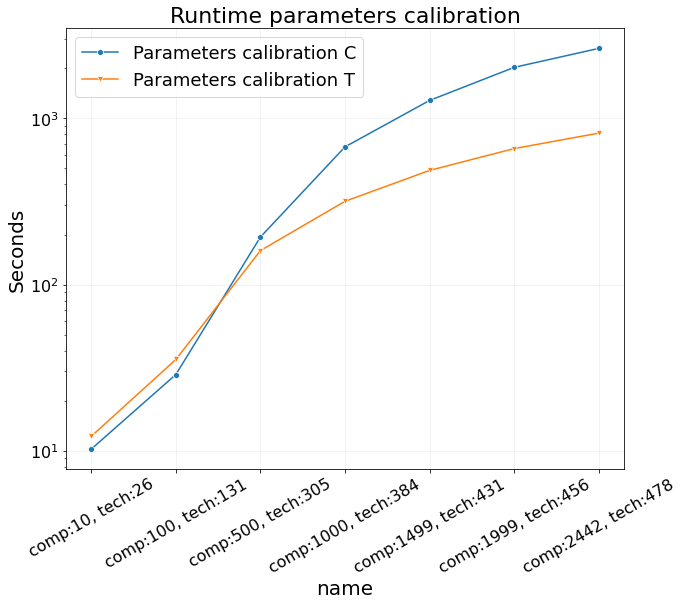

In [183]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
plt.rcParams.update(params)
sns.lineplot(x='name', y='time_optimal_par_comp', marker='o', data = df_time)
sns.lineplot(x='name', y='time_optimal_par_tech', marker='v', data = df_time)
ax.set_yscale("log")
plt.legend(['Parameters calibration C', 'Parameters calibration T', 'Random walk C', 'Random walk T'])
plt.grid(alpha=0.2)
plt.xticks(rotation=30)
plt.ylabel('Seconds')
plt.title("Runtime parameters calibration")
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig("plots/analysis_results/Runtime_parameters.pdf")
plt.show()

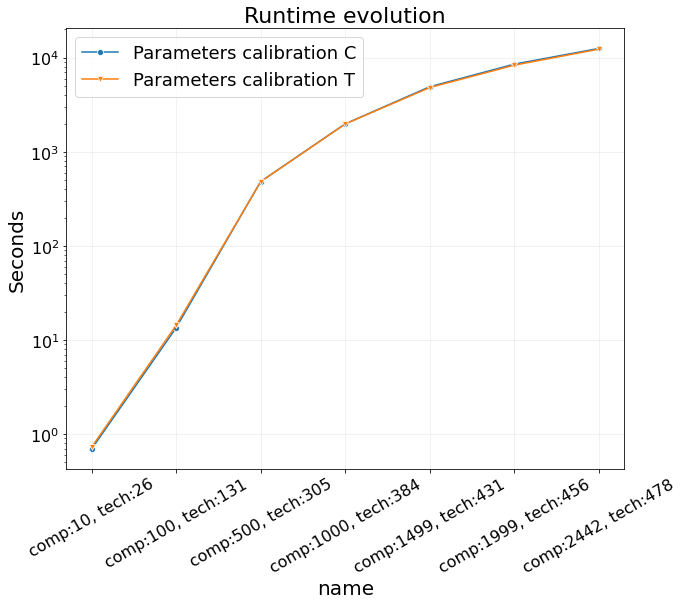

In [184]:
fig, ax = plt.subplots(1, 1, figsize=(10,9))
sns.lineplot(x='name', y='time_conv_comp', marker='o', data = df_time)
sns.lineplot(x='name', y='time_conv_tech', marker='v', data = df_time)
ax.set_yscale("log")
plt.legend(['Parameters calibration C', 'Parameters calibration T', 'Random walk C', 'Random walk T'])
plt.grid(alpha=0.2)
plt.xticks(rotation=30)
plt.ylabel('Seconds')
plt.title("Runtime evolution")
plt.gcf().subplots_adjust(bottom=0.20)
plt.savefig("plots/analysis_results/Runtime_evolution.pdf")
plt.show()

In [165]:
df_time_tech = df_time[['num_tech', 'time_optimal_par_tech', 'time_conv_tech']]
df_time_tech = df_time_tech.set_index('num_tech')
df_time_comp = df_time[['num_comp', 'time_optimal_par_comp', 'time_conv_comp']]
df_time_comp = df_time_comp.set_index('num_comp')

In [166]:
df_time_comp

,time_optimal_par_comp,time_conv_comp
num_comp,,
10,10.24,0.69
100,28.77,13.50
500,193.09,483.72
1000,673.43,"1,985.99"
1499,"1,281.04","4,927.04"
1999,"2,025.59","8,562.58"
2442,"2,633.77","12,573.09"


In [167]:
df_time_tech

,time_optimal_par_tech,time_conv_tech
num_tech,,
26,12.23,0.73
131,35.42,14.34
305,160.14,481.56
384,316.87,"1,980.02"
431,486.02,"4,827.28"
456,657.72,"8,346.16"
478,814.78,"12,347.66"


In [ ]:

plt.rcParams.update(params)

In [ ]:
params = {
    'axes.labelsize': 20,
    'axes.titlesize':22, 
    'legend.fontsize': 18, 
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}

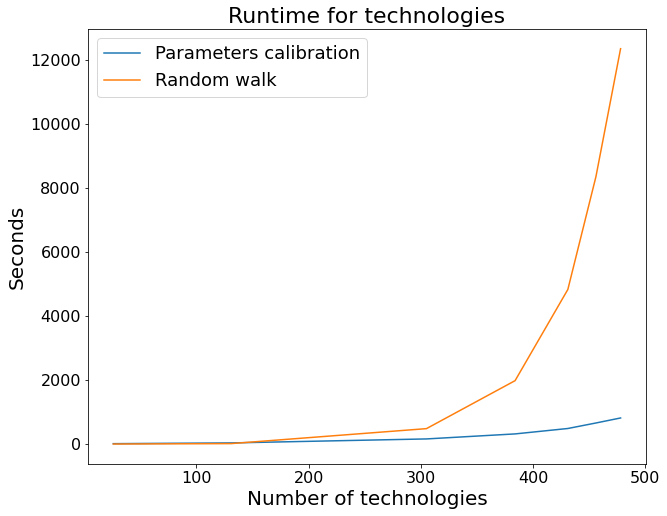

In [170]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plt.plot(df_time_tech.index, df_time_tech['time_optimal_par_tech'])
plt.rcParams.update(params)
plt.plot(df_time_tech.index, df_time_tech['time_conv_tech'])
plt.legend(['Parameters calibration', 'Random walk'])
plt.title("Runtime for technologies")
plt.ylabel("Seconds")
plt.xlabel("Number of technologies")
plt.savefig("plots/analysis_results/runtime_tech.pdf")
plt.show()

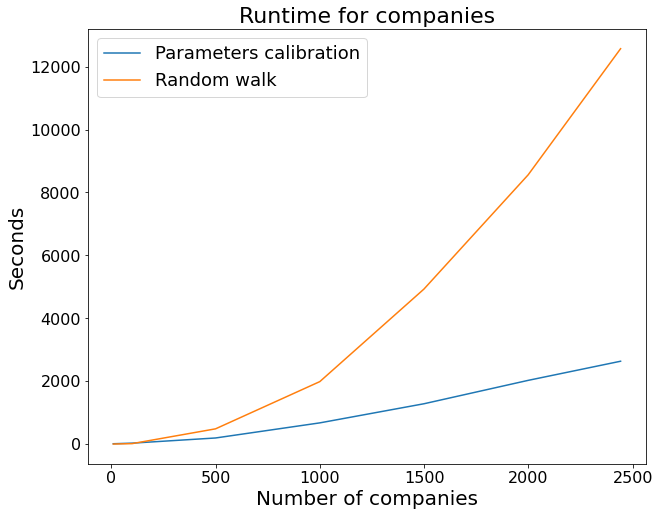

In [171]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
plt.plot(df_time_comp.index, df_time_comp['time_optimal_par_comp'])
plt.plot(df_time_comp.index, df_time_comp['time_conv_comp'])
plt.legend(['Parameters calibration', 'Random walk'])
plt.title("Runtime for companies")
plt.ylabel("Seconds")
plt.xlabel("Number of companies")
plt.show()

In [174]:
df_time_comp['entity'] = ['Companies' for i in range(len(df_time_comp))]
a = df_time_comp[['time_optimal_par_comp', 'entity']]
a = a.rename(columns={'time_optimal_par_comp': 'time'})
a

,time,entity
num_comp,,
10,10.24,Companies
100,28.77,Companies
500,193.09,Companies
1000,673.43,Companies
1499,"1,281.04",Companies
1999,"2,025.59",Companies
2442,"2,633.77",Companies


In [175]:
df_time_tech['entity'] = ['Technologies' for i in range(len(df_time_tech))]
b = df_time_tech[['time_optimal_par_tech', 'entity']]
b = b.rename(columns={'time_optimal_par_tech': 'time'})
b

,time,entity
num_tech,,
26,12.23,Technologies
131,35.42,Technologies
305,160.14,Technologies
384,316.87,Technologies
431,486.02,Technologies
456,657.72,Technologies
478,814.78,Technologies


In [176]:
a = a.append(b)
a = a.reset_index()
a

,index,time,entity
0,10,10.24,Companies
1,100,28.77,Companies
2,500,193.09,Companies
3,1000,673.43,Companies
4,1499,"1,281.04",Companies
5,1999,"2,025.59",Companies
6,2442,"2,633.77",Companies
7,26,12.23,Technologies
8,131,35.42,Technologies
9,305,160.14,Technologies


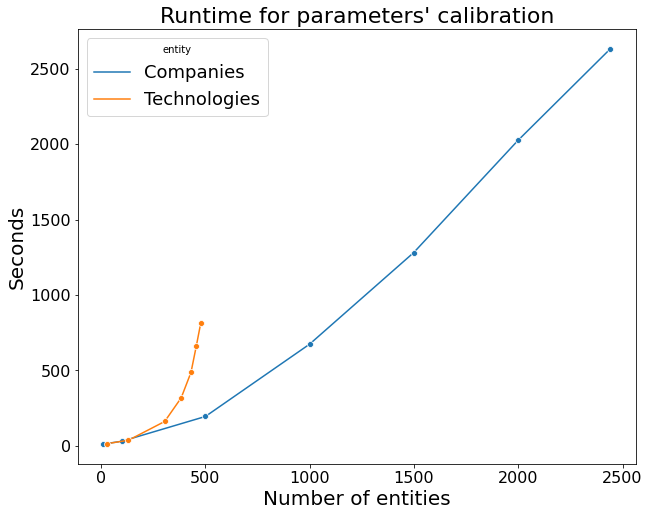

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(10,8))
sns.lineplot(x='index', y="time",
            hue="entity",
            data=a,  
            marker='o');
plt.title("Runtime for parameters' calibration")
plt.xlabel("Number of entities")
plt.ylabel("Seconds")
plt.savefig("plots/analysis_results/scatter_plot_parameters_calibration.pdf")

## Analysis results evolution Cybersecurity <a class="anchor" id="evolution"></a>

In [65]:
# imputs! 
# change them and teh rest of the code will react accordingly
# please make sure to match the num of companies with the right number of technologies

num_comp = 100
num_tech = 134
flag_cybersecurity = True

In [66]:
if flag_cybersecurity==True:
    name_file_com = f'savings/classes/dict_companies_cybersecurity_{num_comp}.pickle'
    name_file_tech = f'savings/classes/dict_tech_cybersecurity_{num_tech}.pickle'
    name_file_graph = f'savings/networks/cybersecurity_comp_{num_comp}_tech_{num_tech}.gpickle'
    name_M = f'savings/M/cybersecurity_comp_{num_comp}_tech_{num_tech}.npy'

In [67]:
with open(name_file_com, 'rb') as f:
    dict_companies = pickle.load(f)
    
with open(name_file_tech, 'rb') as f:
    dict_tech = pickle.load(f)

B = nx.read_gpickle(name_file_graph)


In [77]:
df_tech = pd.read_csv("savings/csv_results/cybersecurity/complete_tech_" + str(num_tech) + "_{'previous_investments': 100}.csv")

In [82]:
df_techrank_tech = df_tech[['final_configuration', 'techrank', ]] # select only the teckrank
df_techrank_tech = df_techrank_tech.rename(columns={'final_configuration': 'name'})
df_techrank_tech = df_techrank_tech.sort_values('techrank', ascending=False)

In [83]:
df_techrank_tech.head()

,name,techrank
130,Software,6.384
129,Cyber Security,6.230
128,Security,6.031
127,Information Technology,5.630
126,Enterprise Software,5.618


In [142]:
params = {
    'axes.labelsize': 22,
    'axes.titlesize':24, 
    'legend.fontsize': 18, 
    'xtick.labelsize': 16, 
    'ytick.labelsize': 16}


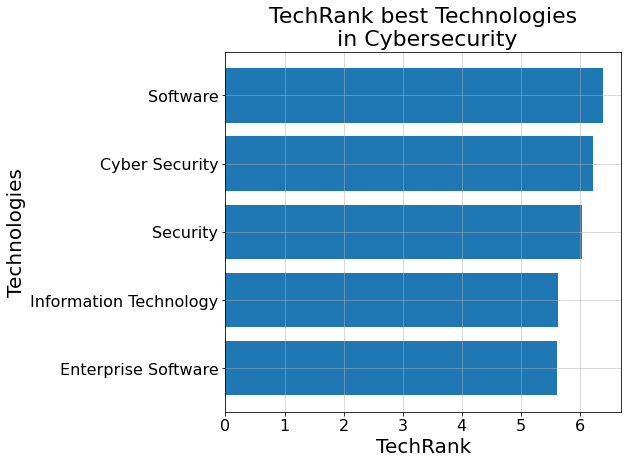

In [228]:
plt.figure(figsize=(10, 8))
plt.rcParams.update(params)
y = df_techrank_tech['name'][:5]
x = df_techrank_tech['techrank'][:5]
plt.barh(y,x)
plt.grid(alpha=0.6)
plt.gca().invert_yaxis()
plt.title("TechRank best Technologies\n in Cybersecurity")
plt.xlabel("TechRank")
plt.ylabel("Technologies")
plt.gcf().subplots_adjust(top=0.75, left=0.35)
plt.savefig("plots/analysis_results/techrank_best_tech_cyber.pdf")
plt.show()

In [146]:
df_comp = pd.read_csv("savings/csv_results/cybersecurity/complete_companies_" + str(num_comp) + "_{'previous_investments': 100, 'crunchbase_rank': 0}.csv")

In [147]:
df_comp = df_comp.rename(columns={'final_configuration': 'name'})
df_comp = df_comp.sort_values('techrank', ascending=False)
df_comp.head()

,initial_position,name,degree,techrank,rank_CB,techrank_normlized,rank_CB_normlized,TeckRank_int
99,98,Axis Security,0,6.78,744.00,10.00,"17,049.00",100.00
98,89,MeWe,0,6.53,"5,701.00",9.63,"12,092.00",99.00
97,99,Lacework,0,6.42,581.00,9.48,"17,212.00",98.00
96,77,CAST Software,0,6.36,"15,622.00",9.39,"2,171.00",97.00
95,95,GAN Integrity,0,6.29,"11,792.00",9.28,"6,001.00",96.00


In [148]:
df_comp[['name', 'TeckRank_int', 'rank_CB_normlized']][:20]

,name,TeckRank_int,rank_CB_normlized
99,Axis Security,100.00,"17,049.00"
98,MeWe,99.00,"12,092.00"
97,Lacework,98.00,"17,212.00"
96,CAST Software,97.00,"2,171.00"
95,GAN Integrity,96.00,"6,001.00"
94,BlueVoyant,95.00,"14,672.00"
93,Mission Secure,94.00,"7,575.00"
92,Immuta,93.00,"15,891.00"
91,x.ai,92.00,"14,429.00"
90,Threatcare,91.00,"9,738.00"


In [149]:
df_techrank_comp = df_comp[['name', 'techrank']] # select only the teckrank
df_techrank_comp = df_techrank_comp.sort_values('techrank', ascending=False)
df_techrank_comp.head()

,name,techrank
99,Axis Security,6.78
98,MeWe,6.53
97,Lacework,6.42
96,CAST Software,6.36
95,GAN Integrity,6.29


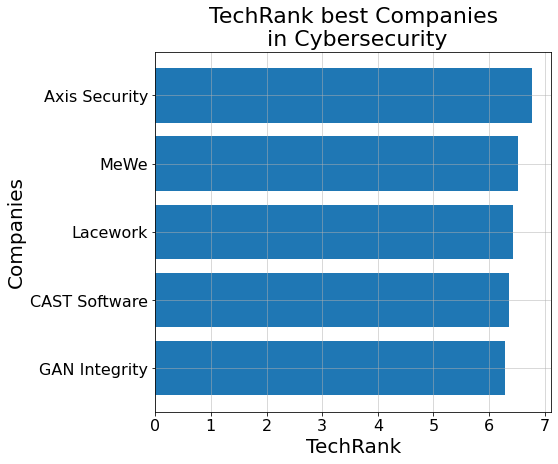

In [229]:
plt.figure(figsize=(10, 8))
plt.rcParams.update(params)
y = df_techrank_comp['name'][:5]
x = df_techrank_comp['techrank'][:5]
plt.barh(y,x)
plt.grid(alpha=0.6)
plt.gca().invert_yaxis()
plt.title("TechRank best Companies\n in Cybersecurity")
plt.xlabel("TechRank")
plt.ylabel("Companies")
plt.gcf().subplots_adjust(top=0.75, left=0.35)
plt.savefig("plots/analysis_results/techrank_best_comp_cyber.pdf")
plt.show()